In [1]:
# ## Import Libraries
# Import all required libraries at the beginning for clarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
# Read the loan data from CSV file
df = pd.read_csv('data/datasets/loan_data.csv')
odf = pd.read_csv('data/hmda2017NYC.csv') #Old df

/var/folders/x7/rdsx4yt12ns9w6q2h2qykt2m0000gn/T/ipykernel_2149/517075629.py:3: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  odf = pd.read_csv('data/hmda2017NYC.csv') #Old df


In [3]:
# ## Section 5: Data Preprocessing
print("\n" + "="*80)
print("SECTION 5: DATA PREPROCESSING")
print("="*80)


SECTION 5: DATA PREPROCESSING


In [4]:
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)

Dataset shape: (445822, 18)

Data types:
loan_type                        object
property_type                    object
purpose                          object
owner_occupancy                  object
loan_amount_k                     int64
action_taken                     object
county                           object
census_tract                    float64
applicant_ethnicity              object
co_applicant_ethnicity           object
applicant_race                   object
co_applicant_race                object
applicant_sex                    object
co_applicant_sex                 object
applicant_income_k              float64
lien_status                      object
median_family_income            float64
relative_neighborhood_income    float64
dtype: object


In [7]:
print("\n Missing Values Check:")
missing_values = df.isnull().sum()  # Count missing values in each column
missing_percentage = (missing_values / len(df)) * 100  # Calculate percentage of missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
# Display only columns with missing data
print(missing_df[missing_df['Percentage (%)'] > 0])
print(f"\nTotal missing values: {missing_values.sum()}")  # Total missing values across dataset


 Missing Values Check:
                              Missing Values  Percentage (%)
county                                   552        0.123816
census_tract                             931        0.208828
applicant_income_k                     53156       11.923144
median_family_income                     931        0.208828
relative_neighborhood_income             931        0.208828

Total missing values: 56501


In [8]:
df['applicant_income_k'] = df['applicant_income_k'].fillna(df['applicant_income_k'].median())

In [228]:
#Investigating county

# Filter rows where county_name is missing and msamd_name is not missing
missing_counties_non_nan_msamd = odf.loc[
    odf['county_name'].isnull() & odf['msamd_name'].notnull(), 
    ['county_name', 'msamd_name']
]

if missing_counties_non_nan_msamd.empty:
    print("No rows found where 'county_name' is missing and 'msamd_name' has a value.")
    print("Cant fill it in then will need to drop")
else:
    print(missing_counties_non_nan_msamd)


No rows found where 'county_name' is missing and 'msamd_name' has a value.
Cant fill it in then will need to drop


In [229]:
#Remove the records with empty value county
# Remove rows where 'county' is NaN
print("Records remaining:", len(df))

df = df.dropna(subset=['county'])

# Optionally, print the resulting DataFrame or count of records
print("Records remaining:", len(df))



Records remaining: 445822
Records remaining: 445270


In [230]:
print("\n Missing Values Check:")
missing_values = df.isnull().sum()  # Count missing values in each column
missing_percentage = (missing_values / len(df)) * 100  # Calculate percentage of missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
# Display only columns with missing data
print(missing_df[missing_df['Percentage (%)'] > 0])
print(f"\nTotal missing values: {missing_values.sum()}")  # Total missing values across dataset


 Missing Values Check:
                              Missing Values  Percentage (%)
census_tract                             379        0.085117
median_family_income                     379        0.085117
relative_neighborhood_income             379        0.085117

Total missing values: 1137


In [231]:
# Count rows where all three specified columns are missing
missing_all = df[['census_tract', 'median_family_income', 'relative_neighborhood_income']].isnull().all(axis=1).sum()

if missing_all == 379:
    print("will remove all rows")
else:
    print("Further investigation required")
    
print("Rows where all three columns are missing:", missing_all)


will remove all rows
Rows where all three columns are missing: 379


In [232]:
# Means in total there all 379 columns are missing all three values, therefore
# I will remove these rows for the data set

In [233]:
df = df.dropna(subset=['census_tract', 'median_family_income', 'relative_neighborhood_income'])

print("Rows remaining:", len(df))


Rows remaining: 444891


In [234]:
print("\n Missing Values Check:")
missing_values = df.isnull().sum()  # Count missing values in each column
missing_percentage = (missing_values / len(df)) * 100  # Calculate percentage of missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
# Display only columns with missing data
print(missing_df[missing_df['Percentage (%)'] > 0])
print(f"\nTotal missing values: {missing_values.sum()}")  # Total missing values across dataset


 Missing Values Check:
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []

Total missing values: 0


In [235]:
# Define the categories to keep
keep_actions = ['Loan originated', 'Application denied by financial institution']

# Filter the DataFrame to keep only the desired action_taken values
df = df[df['action_taken'].isin(keep_actions)].copy()

# Map "Loan originated" to 1 (Approved) and "Application denied by financial institution" to 0 (Rejected)
df['loan_status'] = df['action_taken'].map({'Loan originated': 1, 'Application denied by financial institution': 0})

# Verify the transformation
print(df[['action_taken', 'loan_status']].head(10))



                                   action_taken  loan_status
0                               Loan originated            1
1                               Loan originated            1
2   Application denied by financial institution            0
3   Application denied by financial institution            0
4                               Loan originated            1
5                               Loan originated            1
6                               Loan originated            1
7   Application denied by financial institution            0
10  Application denied by financial institution            0
11                              Loan originated            1


In [236]:
print(f"Dataset shape: {df.shape}")
print(df.head(10))

Dataset shape: (303730, 19)
       loan_type                                      property_type  \
0   Conventional  One-to-four family dwelling (other than manufa...   
1   Conventional  One-to-four family dwelling (other than manufa...   
2   Conventional  One-to-four family dwelling (other than manufa...   
3   Conventional                               Manufactured housing   
4   Conventional  One-to-four family dwelling (other than manufa...   
5   Conventional  One-to-four family dwelling (other than manufa...   
6   Conventional  One-to-four family dwelling (other than manufa...   
7    FHA-insured  One-to-four family dwelling (other than manufa...   
10  Conventional  One-to-four family dwelling (other than manufa...   
11  Conventional  One-to-four family dwelling (other than manufa...   

             purpose                             owner_occupancy  \
0      Home purchase      Owner-occupied as a principal dwelling   
1        Refinancing      Owner-occupied as a principa

In [237]:
# Identify the top 1 rows with the largest applicant_income_k
#As seen in the box plot in the EDA there is 1 major outlier that needs to be inspected
outliers_income = df.nlargest(1, 'applicant_income_k')

print("Applicant Income Outliers:")
display(outliers_income)


Applicant Income Outliers:


,loan_type,property_type,purpose,owner_occupancy,loan_amount_k,action_taken,county,census_tract,applicant_ethnicity,co_applicant_ethnicity,applicant_race,co_applicant_race,applicant_sex,co_applicant_sex,applicant_income_k,lien_status,median_family_income,relative_neighborhood_income,loan_status
89714,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,1000,Application denied by financial institution,Kings County,245.0,Not Hispanic or Latino,Not Hispanic or Latino,White,White,Female,Male,133549.0,Secured by a first lien,73700.0,80.919998,0


In [238]:
#REMOVES THAT ROW
df = df.drop(outliers_income.index)

In [239]:
# Identify the top 1 rows with the largest applicant_income_k
#As seen in the box plot in the EDA there is 1 major outlier that needs to be inspected
outliers_loanAM = df.nlargest(1, 'loan_amount_k')

print("Loan Amount Major Outlier:")
display(outliers_loanAM)

Loan Amount Major Outlier:


,loan_type,property_type,purpose,owner_occupancy,loan_amount_k,action_taken,county,census_tract,applicant_ethnicity,co_applicant_ethnicity,applicant_race,co_applicant_race,applicant_sex,co_applicant_sex,applicant_income_k,lien_status,median_family_income,relative_neighborhood_income,loan_status
185080,Conventional,Multifamily dwelling,Refinancing,Not applicable,3400000,Loan originated,Queens County,413.0,Not applicable,No co-applicant,Not applicable,No co-applicant,Not applicable,No co-applicant,93.0,Secured by a first lien,73700.0,65.699997,1


In [240]:
#REMOVES THAT ROW
df = df.drop(outliers_loanAM.index)

In [241]:
# Function to determine co-applicant status based only on race and ethnicity

print("""        

0 = No co applicant 
1 = co applicant 
2 = Not applicable 
3 = information not available


""")

def get_co_applicant_status(row):
    values = [
        row['co_applicant_race'],
        row['co_applicant_ethnicity']
    ]
    
    if all(v == 'No co-applicant' for v in values):
        return 0  # Definitely no co-applicant
    elif all(v == 'Not applicable' for v in values):
        return 2  # Not applicable
    elif all(v == 'information not provided' for v in values):
        return 3  # Information not provided
    else:
        return 1  # Has co-applicant with data
        
# Apply the function to create the co-applicant status column
df['co_applicant_status'] = df.apply(get_co_applicant_status, axis=1)

# Check the distribution
print(df['co_applicant_status'].value_counts())
print(df['co_applicant_status'].value_counts(normalize=True) * 100)



        

0 = No co applicant 
1 = co applicant 
2 = Not applicable 
3 = information not available



0    177113
1    110245
3     16007
2       363
Name: co_applicant_status, dtype: int64
0    58.313030
1    36.297279
3     5.270176
2     0.119515
Name: co_applicant_status, dtype: float64


In [242]:
print(df[['co_applicant_ethnicity','co_applicant_race', 'co_applicant_sex' , 'co_applicant_status']].head(30))


      co_applicant_ethnicity          co_applicant_race  \
0            No co-applicant            No co-applicant   
1            No co-applicant            No co-applicant   
2            No co-applicant            No co-applicant   
3            No co-applicant            No co-applicant   
4   information not provided   information not provided   
5            No co-applicant            No co-applicant   
6   information not provided   information not provided   
7            No co-applicant            No co-applicant   
10           No co-applicant            No co-applicant   
11           No co-applicant            No co-applicant   
12           No co-applicant            No co-applicant   
13           No co-applicant            No co-applicant   
15           No co-applicant            No co-applicant   
16  information not provided   information not provided   
17           No co-applicant            No co-applicant   
18  information not provided   information not provided 

In [243]:
# Filter the DataFrame for rows that satisfy the condition
filtered_df = df[
    df['co_applicant_status'].isin([0,3]) &
    df['co_applicant_sex'].str.lower().isin(['male', 'female'])
]

# Print only the 'co_applicant_status' and 'co_applicant_sex' columns for the first 10 records
print(filtered_df[['co_applicant_ethnicity','co_applicant_status', 'co_applicant_sex','co_applicant_race']].head(10))


       co_applicant_ethnicity  co_applicant_status co_applicant_sex  \
29   information not provided                    3           Female   
120  information not provided                    3           Female   
174  information not provided                    3             Male   
384  information not provided                    3           Female   
440  information not provided                    3           Female   
487  information not provided                    3             Male   
502  information not provided                    3           Female   
515  information not provided                    3             Male   
572  information not provided                    3             Male   
722  information not provided                    3           Female   

            co_applicant_race  
29   information not provided  
120  information not provided  
174  information not provided  
384  information not provided  
440  information not provided  
487  information not provi

In [244]:
#some columns have provided co applicant gender but not ethnicity or race, which is fine

In [245]:

# 1. Calculate the loan-to-income ratio and add it to the DataFrame
df['loan_to_income_ratio'] = df['loan_amount_k'] / df['applicant_income_k']

# 2. Optionally, filter out any infinite, missing, or non-positive ratios
df = df[np.isfinite(df['loan_to_income_ratio']) & (df['loan_to_income_ratio'] > 0)]

# 3. Display the first few rows to verify the new column
print(df[['loan_amount_k', 'applicant_income_k', 'loan_to_income_ratio']].head())


   loan_amount_k  applicant_income_k  loan_to_income_ratio
0            705               462.0              1.525974
1            112                96.0              1.166667
2            356               115.0              3.095652
3             58                25.0              2.320000
4            800               181.0              4.419890


In [246]:
selected_columns = [
    'loan_type', 
    'property_type', 
    'purpose', 
    'owner_occupancy',
    'loan_amount_k', 
    'applicant_income_k',
    'lien_status',
    'loan_status',
    'county',
    'applicant_race',
    'applicant_ethnicity',
    'applicant_sex', 
    'co_applicant_status',
    'loan_to_income_ratio'
    
    
]

# Create a new DataFrame with only these columns
# All previous manipulations to df will be preserved in these columns
df_A = df[selected_columns]

# Preview the first few rows
print("Preview of selected data:")
print(df_A.head(10))

# Export to CSV
output_filename = 'Protected_loan_approval_data.csv'
df_A.to_csv(output_filename, index=False)

print(f"\nData successfully exported to {output_filename}")

# Optional: Show data info
print("\nDataset information:")
print(f"Number of rows: {df_A.shape[0]}")
print(f"Number of columns: {df_A.shape[1]}")
print("\nColumn data types:")
print(df_A.dtypes)

Preview of selected data:
        loan_type                                      property_type  \
0    Conventional  One-to-four family dwelling (other than manufa...   
1    Conventional  One-to-four family dwelling (other than manufa...   
2    Conventional  One-to-four family dwelling (other than manufa...   
3    Conventional                               Manufactured housing   
4    Conventional  One-to-four family dwelling (other than manufa...   
5    Conventional  One-to-four family dwelling (other than manufa...   
6    Conventional  One-to-four family dwelling (other than manufa...   
7     FHA-insured  One-to-four family dwelling (other than manufa...   
10   Conventional  One-to-four family dwelling (other than manufa...   
11   Conventional  One-to-four family dwelling (other than manufa...   
12  VA-guaranteed  One-to-four family dwelling (other than manufa...   
13   Conventional  One-to-four family dwelling (other than manufa...   
15   Conventional  One-to-four family 

In [5]:
df = pd.read_csv('data/datasets/Protected_loan_approval_data.csv') 

In [6]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 303728
Number of columns: 14


In [249]:
print("Number of unique counties:", df['county'].nunique())
print("Unique counties:", df['county'].unique())


Number of unique counties: 62
Unique counties: ['New York County' 'Clinton County' 'Kings County' 'Oneida County'
 'Queens County' 'Livingston County' 'Dutchess County' 'Nassau County'
 'Chemung County' 'Jefferson County' 'Erie County' 'Orange County'
 'Bronx County' 'Cayuga County' 'Putnam County' 'Fulton County'
 'Columbia County' 'Monroe County' 'Richmond County' 'Oswego County'
 'Otsego County' 'Albany County' 'Onondaga County' 'Chautauqua County'
 'Madison County' 'Lewis County' 'Broome County' 'Rensselaer County'
 'Essex County' 'Cattaraugus County' 'Niagara County' 'Chenango County'
 'Genesee County' 'Ontario County' 'Delaware County' 'Allegany County'
 'Cortland County' 'Rockland County' 'Orleans County' 'Herkimer County'
 'Hamilton County' 'Greene County' 'Franklin County' 'Wayne County'
 'Sullivan County' 'Washington County' 'Suffolk County'
 'Westchester County' 'Ulster County' 'Steuben County' 'Seneca County'
 'Saratoga County' 'St. Lawrence County' 'Montgomery County'
 'Sc

In [250]:
def map_county_to_region(county):
    # New York City Region
    if county in ['Bronx County', 'Kings County', 'New York County', 'Queens County', 'Richmond County']:
        return 'NYC'
    
    # Long Island Region
    elif county in ['Nassau County', 'Suffolk County']:
        return 'Long Island'
    
    # Hudson Valley Region
    elif county in ['Dutchess County', 'Orange County', 'Putnam County', 'Rockland County', 
                   'Sullivan County', 'Ulster County', 'Westchester County', 'Columbia County']:
        return 'Hudson Valley'
    
    # Capital Region
    elif county in ['Albany County', 'Greene County', 'Rensselaer County', 'Saratoga County', 
                   'Schenectady County', 'Warren County', 'Washington County']:
        return 'Capital Region'
    
    # Mohawk Valley
    elif county in ['Fulton County', 'Herkimer County', 'Montgomery County', 
                   'Oneida County', 'Otsego County', 'Schoharie County']:
        return 'Mohawk Valley'
    
    # North Country
    elif county in ['Clinton County', 'Essex County', 'Franklin County', 'Hamilton County',
                   'Jefferson County', 'Lewis County', 'St. Lawrence County']:
        return 'North Country'
    
    # Central New York
    elif county in ['Cayuga County', 'Cortland County', 'Madison County', 
                   'Onondaga County', 'Oswego County']:
        return 'Central NY'
    
    # Southern Tier
    elif county in ['Broome County', 'Chemung County', 'Chenango County', 'Delaware County',
                   'Schuyler County', 'Steuben County', 'Tioga County', 'Tompkins County']:
        return 'Southern Tier'
    
    # Finger Lakes
    elif county in ['Genesee County', 'Livingston County', 'Monroe County', 'Ontario County',
                   'Orleans County', 'Seneca County', 'Wayne County', 'Wyoming County', 'Yates County']:
        return 'Finger Lakes'
    
    # Western New York
    elif county in ['Allegany County', 'Cattaraugus County', 'Chautauqua County', 
                   'Erie County', 'Niagara County']:
        return 'Western NY'
    
    else:
        return 'Other'  # Fallback in case any county is missed

# Step 2: Apply the mapping to create the region column
df['region'] = df['county'].apply(map_county_to_region)


In [251]:
df = df.drop('county', axis=1)

In [252]:
print(df.head(2))

      loan_type                                      property_type  \
0  Conventional  One-to-four family dwelling (other than manufa...   
1  Conventional  One-to-four family dwelling (other than manufa...   

         purpose                         owner_occupancy  loan_amount_k  \
0  Home purchase  Owner-occupied as a principal dwelling            705   
1    Refinancing  Owner-occupied as a principal dwelling            112   

   applicant_income_k              lien_status  loan_status  \
0               462.0  Secured by a first lien            1   
1                96.0  Secured by a first lien            1   

             applicant_race       applicant_ethnicity  \
0  information not provided  information not provided   
1  information not provided    Not Hispanic or Latino   

              applicant_sex  co_applicant_status  loan_to_income_ratio  \
0  information not provided                    0              1.525974   
1                    Female                    0     

In [253]:
columns_to_encode = ['loan_type', 'purpose', 'property_type', 'lien_status', 'owner_occupancy', 'applicant_race', 'applicant_ethnicity','applicant_sex','region']

df = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)

display(df.head(1))

,loan_amount_k,applicant_income_k,loan_status,co_applicant_status,loan_to_income_ratio,loan_type_Conventional,loan_type_FHA-insured,loan_type_FSA/RHS-guaranteed,loan_type_VA-guaranteed,purpose_Home improvement,...,region_Capital Region,region_Central NY,region_Finger Lakes,region_Hudson Valley,region_Long Island,region_Mohawk Valley,region_NYC,region_North Country,region_Southern Tier,region_Western NY
0,705,462.0,1,0,1.525974,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [254]:
#Removing records where applicant sex is not applicable or the infomration is not provided
#Dropping those columns 
mask = (df['applicant_sex_Not applicable'] == 1) | (df['applicant_sex_information not provided'] == 1)

# Drop those rows by selecting the inverse of the mask
df = df[~mask].copy()
df.drop(columns=['applicant_sex_Not applicable', 'applicant_sex_information not provided'], inplace=True)
print("New DataFrame shape:", df.shape)

New DataFrame shape: (273163, 44)


In [255]:
# Define the list of columns to check and drop.
cols_to_check = [
    'applicant_race_Not applicable',
    'applicant_ethnicity_Not applicable',
    'applicant_race_information not provided',
    'applicant_ethnicity_Not applicable'
]

# Optionally remove duplicates from the list (if any)
cols_to_check = list(set(cols_to_check))

# Create a boolean mask: True for rows where at least one of the columns equals 1.
mask = df[cols_to_check].eq(1).any(axis=1)

# Remove records with any 1 in these columns.
df = df[~mask].copy()

# Now drop the specified columns from the DataFrame.
df = df.drop(columns=cols_to_check)

# Display the updated DataFrame shape or head to confirm.
print("New shape of df:", df.shape)
display(df.head())

New shape of df: (256368, 41)


,loan_amount_k,applicant_income_k,loan_status,co_applicant_status,loan_to_income_ratio,loan_type_Conventional,loan_type_FHA-insured,loan_type_FSA/RHS-guaranteed,loan_type_VA-guaranteed,purpose_Home improvement,...,region_Capital Region,region_Central NY,region_Finger Lakes,region_Hudson Valley,region_Long Island,region_Mohawk Valley,region_NYC,region_North Country,region_Southern Tier,region_Western NY
2,356,115.0,0,0,3.095652,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,58,25.0,0,0,2.320000,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,100,84.0,1,0,1.190476,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,61,49.0,0,0,1.244898,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,250,72.0,0,0,3.472222,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [256]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 256368
Number of columns: 41


In [2]:
# Export to CSV
output_filename = 'Protected_Processed.csv'
df.to_csv(output_filename, index=False)

NameError: name 'df' is not defined

In [7]:
df = pd.read_csv('data/Protected_Processed.csv')

# Step 2: Display available columns with index numbers
print("Available columns:")
for idx, col in enumerate(df.columns):
    print(f"{idx}: {col}")

Available columns:
0: loan_amount_k
1: applicant_income_k
2: loan_status
3: co_applicant_status
4: loan_to_income_ratio
5: loan_type_Conventional
6: loan_type_FHA-insured
7: loan_type_FSA/RHS-guaranteed
8: loan_type_VA-guaranteed
9: purpose_Home improvement
10: purpose_Home purchase
11: purpose_Refinancing
12: property_type_Manufactured housing
13: property_type_Multifamily dwelling
14: property_type_One-to-four family dwelling (other than manufactured housing)
15: lien_status_Not secured by a lien
16: lien_status_Secured by a first lien
17: lien_status_Secured by a subordinate lien
18: owner_occupancy_Not applicable
19: owner_occupancy_Not owner-occupied as a principal dwelling
20: owner_occupancy_Owner-occupied as a principal dwelling
21: applicant_race_American Indian or Alaska Native
22: applicant_race_Asian
23: applicant_race_Black or African American
24: applicant_race_Native Hawaiian or Other Pacific Islander
25: applicant_race_White
26: applicant_ethnicity_Hispanic or Latino
27

In [13]:
# List of protected attribute column names to remove
protected_attributes = [
    # Race-related columns
    'applicant_race_American Indian or Alaska Native',
    'applicant_race_Asian',
    'applicant_race_Black or African American',
    'applicant_race_Native Hawaiian or Other Pacific Islander',
    'applicant_race_White',
    # Ethnicity-related columns
    'applicant_ethnicity_Hispanic or Latino',
    'applicant_ethnicity_Not Hispanic or Latino',
    'applicant_ethnicity_information not provided',
    # Sex-related columns
    'applicant_sex_Female',
    'applicant_sex_Male',
    # Region-related columns
    'region_Capital Region',
    'region_Central NY',
    'region_Finger Lakes',
    'region_Hudson Valley',
    'region_Long Island',
    'region_Mohawk Valley',
    'region_NYC',
    'region_North Country',
    'region_Southern Tier',
    'region_Western NY'
]


# Remove the protected attributes
df_no_protected = df.drop(columns=protected_attributes)

# Save the new DataFrame to a CSV file without the protected attributes
output_filename_no_protected = 'UnProtected_Processed.csv'
df_no_protected.to_csv(output_filename_no_protected, index=False)

In [16]:
# Display the updated DataFrame shape or head to confirm.
print("New shape of df:", df_no_protected.shape)
display(df_no_protected.head())

New shape of df: (256368, 21)


,loan_amount_k,applicant_income_k,loan_status,co_applicant_status,loan_to_income_ratio,loan_type_Conventional,loan_type_FHA-insured,loan_type_FSA/RHS-guaranteed,loan_type_VA-guaranteed,purpose_Home improvement,...,purpose_Refinancing,property_type_Manufactured housing,property_type_Multifamily dwelling,property_type_One-to-four family dwelling (other than manufactured housing),lien_status_Not secured by a lien,lien_status_Secured by a first lien,lien_status_Secured by a subordinate lien,owner_occupancy_Not applicable,owner_occupancy_Not owner-occupied as a principal dwelling,owner_occupancy_Owner-occupied as a principal dwelling
0,356,115.0,0,0,3.095652,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,58,25.0,0,0,2.320000,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,100,84.0,1,0,1.190476,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,61,49.0,0,0,1.244898,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,250,72.0,0,0,3.472222,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


1    202749
0     53619
Name: loan_status, dtype: int64


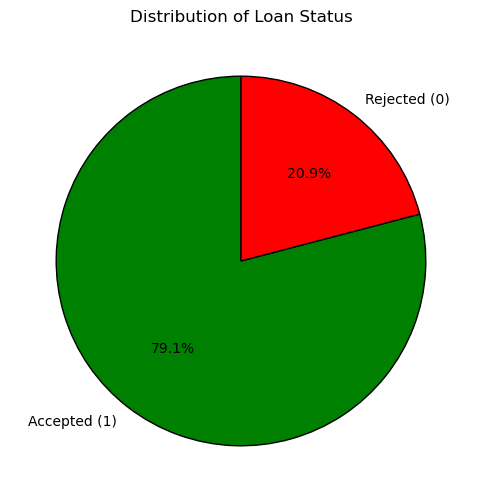

In [14]:
# Check distribution of loan status
loan_status_counts = df['loan_status'].value_counts()

# Print distribution
print(loan_status_counts)

# Plot pie chart
plt.figure(figsize=(6,6))
loan_status_counts.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['green', 'red'], 
    labels=['Accepted (1)', 'Rejected (0)'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.ylabel("")  # Remove y-axis label
plt.title("Distribution of Loan Status")
plt.show()